In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
PATH_INPUT_DATA = '[i] data/'
PATH_OUTPUT_TABLE = '[o] table/'

In [3]:
if not(os.path.isdir(PATH_OUTPUT_TABLE)):
    os.makedirs(PATH_OUTPUT_TABLE)

In [4]:
# train
filename = 'train.csv'
path = PATH_INPUT_DATA + filename
df_train = pd.read_csv(path)

# test
filename = 'test.csv'
path = PATH_INPUT_DATA + filename
df_test = pd.read_csv(path)

# 제출용
filename = 'sample_submission.csv'
path = PATH_INPUT_DATA + filename
df_submission = pd.read_csv(path)

In [5]:
df_train.describe()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,7.982000e+03,7.987000e+03,7.992000e+03,7.931000e+03,8.081000e+03,8.013000e+03,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,17.568000,0.180212,0.203529,0.229804,0.259158,0.289975,0.322244,0.354101,0.384492,...,7.511190e-11,4.270426e-11,2.498465e-11,4.047717e-11,1.153774e-10,2.364072e-10,7.990686,4.009146,9.019226,3.042651
std,2886.89568,5.595847,0.272859,0.288661,0.306340,0.324849,0.342362,0.357700,0.370451,0.379054,...,3.831916e-10,2.293432e-10,1.639150e-10,2.134495e-10,5.179299e-10,1.058272e-09,2.970818,0.997828,2.979453,1.881872
min,0.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.080000,0.000000,0.000000
25%,2499.75000,15.000000,0.007318,0.009520,0.011270,0.013728,0.016350,0.019510,0.026217,0.037235,...,1.574964e-19,0.000000e+00,0.000000e+00,0.000000e+00,5.669218e-18,6.574627e-17,5.990000,3.330000,7.000000,1.640000
50%,4999.50000,20.000000,0.052025,0.064600,0.078565,0.095355,0.119635,0.148590,0.181905,0.219260,...,6.566552e-16,8.391564e-17,2.525680e-17,1.231848e-16,3.395726e-15,1.717923e-14,8.010000,4.010000,8.990000,2.980000
75%,7499.25000,25.000000,0.221117,0.276952,0.339075,0.417478,0.510915,0.607150,0.698085,0.781490,...,9.503366e-13,3.186890e-13,1.234955e-13,2.958971e-13,2.392410e-12,6.942183e-12,10.010000,4.700000,11.020000,4.330000
max,9999.00000,25.000000,1.019990,1.019970,1.019930,1.019880,1.020000,1.019970,1.019970,1.019940,...,1.343132e-08,6.461523e-09,5.773867e-09,5.529940e-09,1.013262e-08,2.682289e-08,21.590000,7.690000,20.070000,10.310000


In [6]:
df_test.describe()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,8.024000e+03,8.081000e+03,8.019000e+03,8.000000e+03,8.001000e+03,8.051000e+03,7.980000e+03,8.024000e+03,7.989000e+03,8.030000e+03
mean,14999.50000,17.495500,0.180019,0.203678,0.230319,0.259816,0.291496,0.323884,0.356673,0.387589,...,7.715626e-11,6.983341e-11,6.524223e-11,8.246489e-11,7.597039e-11,4.429934e-11,2.662845e-11,4.542480e-11,1.197293e-10,2.499737e-10
std,2886.89568,5.615882,0.270866,0.286827,0.304553,0.323496,0.341311,0.357078,0.369559,0.378026,...,3.510083e-10,3.129258e-10,2.928428e-10,3.612487e-10,3.760606e-10,2.404518e-10,1.729574e-10,2.831147e-10,5.361285e-10,1.047715e-09
min,10000.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,12499.75000,10.000000,0.007567,0.009725,0.012220,0.013338,0.016260,0.018985,0.026253,0.036335,...,3.239118e-19,1.198502e-19,1.091996e-19,4.782415e-19,1.697161e-19,0.000000e+00,0.000000e+00,0.000000e+00,6.932872e-18,5.740387e-17
50%,14999.50000,15.000000,0.053375,0.066420,0.082290,0.099510,0.123550,0.151360,0.188430,0.229180,...,1.342652e-15,7.029654e-16,5.635045e-16,1.552119e-15,8.890709e-16,1.289191e-16,2.217595e-17,1.576788e-16,4.863574e-15,2.135066e-14
75%,17499.25000,25.000000,0.225513,0.278710,0.342330,0.422447,0.512260,0.606375,0.698940,0.783555,...,1.655310e-12,1.355777e-12,1.098150e-12,1.542382e-12,1.332899e-12,4.245411e-13,1.387875e-13,3.854661e-13,2.749760e-12,7.590586e-12
max,19999.00000,25.000000,1.019930,1.019950,1.019840,1.019890,1.019900,1.019920,1.020000,1.019890,...,9.353462e-09,8.654387e-09,7.744030e-09,9.627488e-09,1.481643e-08,6.492176e-09,5.715315e-09,9.173911e-09,1.390299e-08,2.156264e-08


In [7]:
df_train.keys()

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
       '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
       '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
       '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
       '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
       '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst', 'hhb', 'hbo2',
       'ca', 'na'],
      dtype='object')

In [8]:
col_input = ['rho_10', 'rho_15', 'rho_20', 'rho_25', 
#col_input = ['rho', 
             '650_src', '660_src', '670_src', '680_src', '690_src',
             '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
             '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
             '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
             '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
             '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
             '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
             '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
             '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
             '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
             '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
             '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']
col_output = ['hhb', 'hbo2', 'ca', 'na']

col_input_src = ['650_src', '660_src', '670_src', '680_src', '690_src',
             '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
             '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
             '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
             '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
             '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',]
col_input_dst = ['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
             '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
             '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
             '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
             '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
             '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']

In [9]:
df_train['rho'].value_counts()

25    2557
15    2509
20    2478
10    2456
Name: rho, dtype: int64

In [10]:
df_train[['rho_10', 'rho_15', 'rho_20', 'rho_25']] = pd.get_dummies(df_train['rho'])
df_test[['rho_10', 'rho_15', 'rho_20', 'rho_25']] = pd.get_dummies(df_test['rho'])

In [11]:
# 1.데이터셋 생성하기
#x_train = df_train[col_input]
#y_train = df_train[col_output]
#x_test = df_test[col_input]
#y_test = df_test[col_output]
#df_train_filled = df_train.dropna(axis=0)
df_train_filled = df_train.fillna(method='pad')
df_train_filled = df_train_filled.fillna(method='bfill')
X = df_train_filled[col_input]
Y = df_train_filled[col_output]
#x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [12]:
# 전처리:스케일 맞춤
idx = col_input[4:]
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(x_train[idx])
x_train[idx] = scaler.transform(x_train[idx])
x_val[idx] = scaler.transform(x_val[idx])
x_test[idx] = scaler.transform(x_test[idx])
#print(np.mean(df_train[idx]), np.std(df_train[idx]))

/Users/juyeonghwan/opt/anaconda3/envs/LittleForest/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juyeonghwan/opt/anaconda3/envs/LittleForest/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
# 2.모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=len(col_input), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(4))

In [21]:
# 3.모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
#model.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])

In [22]:
# 4.모델 학습시키기
#hist = model.fit(x_train, y_train, epochs=200, batch_size=64)
#hist = model.fit(x_train, y_train, validation_split=0.33, epochs=20, batch_size=64)
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=64)

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 2s 337us/step - loss: 12.6634 - accuracy: 0.5159 - val_loss: 5.8789 - val_accuracy: 0.5669
Epoch 2/50
6400/6400 [==============================] - 1s 103us/step - loss: 7.0603 - accuracy: 0.5730 - val_loss: 5.6553 - val_accuracy: 0.5669
Epoch 3/50
6400/6400 [==============================] - 1s 93us/step - loss: 6.4387 - accuracy: 0.5820 - val_loss: 5.4922 - val_accuracy: 0.5688
Epoch 4/50
6400/6400 [==============================] - 1s 87us/step - loss: 6.2673 - accuracy: 0.5791 - val_loss: 5.4447 - val_accuracy: 0.5688
Epoch 5/50
6400/6400 [==============================] - 1s 93us/step - loss: 6.1325 - accuracy: 0.5766 - val_loss: 5.3945 - val_accuracy: 0.5694
Epoch 6/50
6400/6400 [==============================] - 1s 90us/step - loss: 5.9994 - accuracy: 0.5861 - val_loss: 5.3784 - val_accuracy: 0.5688
Epoch 7/50
6400/6400 [==============================] - 1s 94us/step - loss: 5.

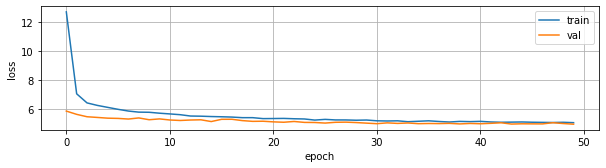

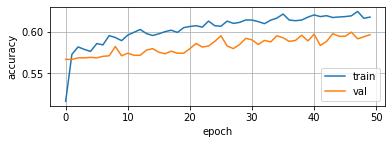

In [23]:
# 5.학습과정 살펴보기
plt.figure(figsize=(10, 5))

# loss
plt.subplot(2,1,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()
plt.show()

# accuracy
plt.subplot(2,1,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()
plt.show()

In [24]:
# 6.모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss, acc: '+str(loss))

2000/2000 [==============================] - 0s 69us/step
loss, acc: [5.092822895050049, 0.6190000176429749]


In [25]:
# 제출용
# 결측치 채우기
df_test_filled = df_test.fillna(method='pad')
df_test_filled = df_test_filled.fillna(method='bfill')
x_subm = df_test_filled[col_input]

# 스케일
idx = col_input[4:]
x_subm[idx] = scaler.transform(x_subm[idx])

loss = model.predict(x_subm)
print('loss: '+str(loss))

/Users/juyeonghwan/opt/anaconda3/envs/LittleForest/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/juyeonghwan/opt/anaconda3/envs/LittleForest/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


loss: [[ 7.705311   3.8140936  8.527751   2.8386831]
 [ 8.107392   3.9033508  8.862085   2.8552136]
 [10.075897   4.149157   9.594938   3.3468194]
 ...
 [ 7.8020816  3.854426   8.9778595  2.8757076]
 [ 7.4832625  3.8640242  8.502069   2.7796402]
 [ 8.084603   4.0167747  8.909757   2.9026184]]


In [26]:
df_sub = pd.DataFrame(loss, columns=['hhb', 'hbo2', 'ca', 'na'])
df_submission = pd.concat([df_test['id'], df_sub], axis=1)

display(df_submission)

path = PATH_OUTPUT_TABLE+'Little_Forest_JYH_.csv'
df_submission.to_csv(path, index=False)

,id,hhb,hbo2,ca,na
0,10000,7.705311,3.814094,8.527751,2.838683
1,10001,8.107392,3.903351,8.862085,2.855214
2,10002,10.075897,4.149157,9.594938,3.346819
3,10003,9.353590,4.043611,9.253167,3.031518
4,10004,7.743704,4.074502,9.197043,3.050540
...,...,...,...,...,...
9995,19995,8.085479,4.052842,9.009356,2.981312
9996,19996,8.063835,3.933924,8.885081,2.904280
9997,19997,7.802082,3.854426,8.977859,2.875708
9998,19998,7.483263,3.864024,8.502069,2.779640


### 해야할 일 
- 결측치 보정
- rho 값에 따라 모델 생성
- rho 값에 따라 스케일
- 스케일할 때 validation set 과 구분
- Dropout